In [1]:
import numpy as np
from astropy.io import ascii, fits
from astropy.io.fits import getdata
from astropy.table import Table, Column,join

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# check basic info of the fits file
### There are six extensions, 1 & 4 are table extensions, 2,3 & 5,6 are image extensions for spectra and their errors.

There are three major differences between ext2&3 and ext5&6.

(1) We provide two types of spectra with their errors in ext 2&3 and ext5&6: 
As an IFU survey, some spacially extended AGNs can be spacially resolved with multiple detections in the hetdex catalog. We do flux weighted friend-of-friend grouping for all AGN detectids with linking length of delta_r=5 arcsec, and delta_redshift = 0.1 to make the unqiue AGN catalog (extension 1). For each AGN, we pick up the detectid closest to the fof center as detectid_best.

ext 2&3 are the spectra for the detectid_best in the hetdex catalog. \
ext5&6 are extracted spectra at the flux weighted friend-of-friend center.

(2) Aonther difference between ext2&3 and ext5&6 is the number of rows are different. \
ext2&3 have 5322 rows, one row for one agn, arranged in the same order with extension 1.\
ext5&6 have 6004 rows. This is because there are some AGNs that have repeat observations (identified by "shotid" in the table of extension 4). We provide all the spectra for repeated observations in ext 5&6. In the table of extension 4, each observation has one row, and the row number of ext5&6 are arranged following extension4.

(3) A minor difference is:\
    ext2&3 spectra with errors are applied with universal extinction correction of E(B-V)=0.02.\
    ext5&6 are raw data with no extinction applied.\
    The extinction correction only makes a <10% difference.

In [3]:
fname = 'hetdex_agn.fits'
hdul = fits.open(fname)
hdul.info()

Filename: hetdex_agn.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  basic_info    1 BinTableHDU    735   5322R x 159C   [K, E, E, E, E, K, 10A, K, K, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 38A, E, E, E, E, 16A, E, E, E, E, 16A, E, E, E, E, 16A, E, 15A, E, E, K, K, K, E, K, E]   
  2  flux_array    1 ImageHDU        11   (1036, 5322)   float32   
  3  error_array    1 ImageHDU        11   (1036, 5322)   float32   
  4  repeat_info    1 BinTableHDU     15   6004R x 3C   [K, K, K]   
  5  flux_array_repeat    1 ImageHDU        11   (1036, 6004)   float32   
  6  error_array_repeat    1 I

## Read extension 1 as a table
### extension 1 has the basic information for each unique AGN, one row per AGN.

In [4]:
agn = Table.read( fname, format = 'fits', hdu = 1 )
agn

<Table length=5322>
agnid     ra       dec        z      z_er  ... mjd_dr16   z_dr16   sflag  apcor 
         deg       deg                     ...                                  
int64  float32   float32   float32 float32 ...  int64    float32   int64 float32
----- --------- ---------- ------- ------- ... -------- ---------- ----- -------
    1 12.274719 -0.5261988   4.165 0.00128 ...    55201   4.165187     0   0.943
    2  210.3998   51.95324   4.148   8e-05 ...    52468  4.1502028     0   0.952
    3 194.16838  51.994675    3.93 0.00047 ...    56419  3.9429967     1    0.93
    4 242.78114  53.702232   3.929 0.00074 ...    56487  3.9316654     0   0.888
    5  165.8053   51.27956   3.912 0.00077 ...    56385   3.912013     1   0.936
    6   9.84455  0.4451806   3.844  0.0002 ...    55186  3.8397486     0   0.961
    7   11.8217  -0.014904   3.767 0.00017 ...    55186  3.7854643     0   0.472
    8 176.67075  52.125137   3.732 0.00017 ...    56416  3.7293863     1   0.896
    9 27.704254   0.691078   3.706 0.00019 ...    55449   3.702474     1   0.856
  ...       ...        ...     ...     ... ...      ...        ...   ...     ...
 5369 220.18811   51.25882    0.26 0.00017 ...    52786 0.26008368     2   0.631
 5370 22.692274 -0.1335406   0.254   3e-05 ...    51820 0.25381678     2   0.904
 5371  9.347875  0.1367988   0.252   1e-05 ...    57006 0.25196669     2   0.925
 5372 205.14743   55.82529   0.246   1e-05 ...    52791 0.24669994     2   0.861
 5373 13.692243   0.701108   0.234   5e-05 ...    51812 0.23403154     0   0.839
 5374 165.21265  51.583958   0.214   3e-05 ...    56385  0.2138869     0   0.925
 5375 36.272396   0.094684   0.213   1e-05 ...    51817  0.2133588     0   0.936
 5376  183.5177   55.68013   0.211   3e-05 ...    52672 0.21136948     0   0.658
 5377 28.867453   0.068565   0.186   2e-05 ...    51871 0.18609864     0   0.931
 5378 165.08255    51.6671   0.181   1e-05 ...    57374 0.18094175     0   0.925

### check the header of the table

In [5]:
agn.info

<Table length=5322>
     name      dtype              unit                               description                  
------------- ------- ---------------------------- -----------------------------------------------
        agnid   int64                                   artificial sequential numbers for each AGN
           ra float32                          deg    RA  of the AGN (center of flux weighted fof)
          dec float32                          deg    DEC of the AGN (center of flux weighted fof)
            z float32                                                                     redshift
         z_er float32                                                            error of redshift
        zflag   int64                                        zflag=0/1: 1 confirmed z; 0 guessed z
        field bytes10                                                   field in the HETDEX survey
       nshots   int64                                                number of repeat obs

## read extension 2 in as a 2-d array

In [6]:
from astrowidgets import ImageWidget

#hdu2, hdr2 = getdata( fname, 2, header = True )
print(hdul[2].header)
im    = hdul[2].data # read spectra in from extension 2
im_er = hdul[3].data # read errors  in from extension 3 if needed

imw = ImageWidget()
imw.cuts = (-1, 25)
imw.load_array(im)
display(imw)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1036                                                  NAXIS2  =                 5322                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               EXTNAME = 'flux_array'                                                          HIERARCH wave_start = '3470.0 AA'                                               HIERARCH wave_step = '   2.0 AA'                                                HIERARCH flux_unit = '1.0e-17 * erg / (cm^2 * s * AA)'                          END                                                                                                                     

ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

## the information of the wave_array corresponds to the flux_array in each row can be found in the header: 
### wave_start = 3470.0, wave_step = 2.0

In [7]:
hdul[2].header['wave_start'], hdul[2].header['wave_step'], hdul[2].header['flux_unit']

('3470.0 AA', '   2.0 AA', '1.0e-17 * erg / (cm^2 * s * AA)')

In [8]:
# prepare wavelength array for the spectra
wave_start = 3470.0
wave_step  = 2.0
n_elements = hdul[2].header['NAXIS1'] #1036
wave_arr = wave_start + wave_step * np.arange( 0, n_elements )
wave_arr

array([3470., 3472., 3474., ..., 5536., 5538., 5540.])

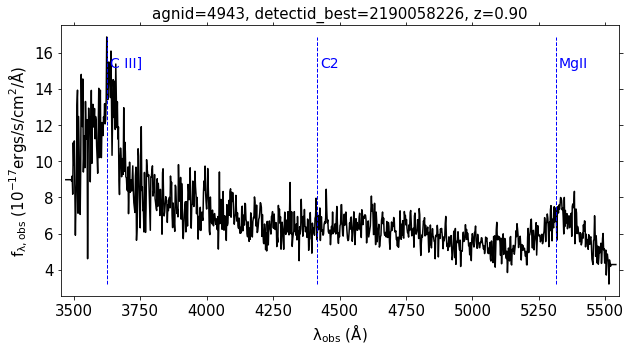

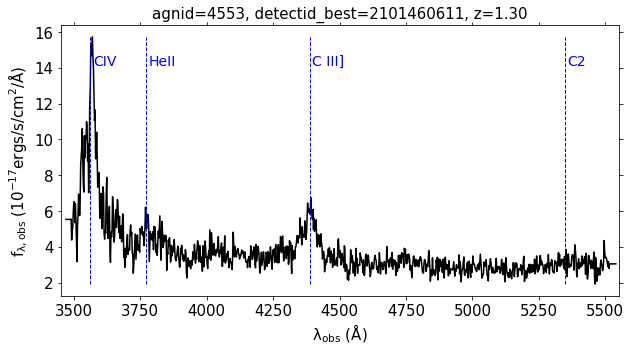

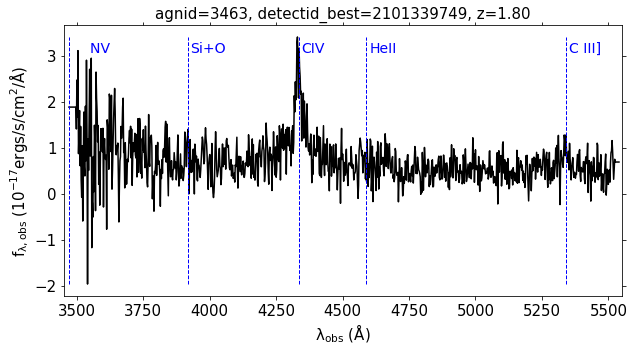

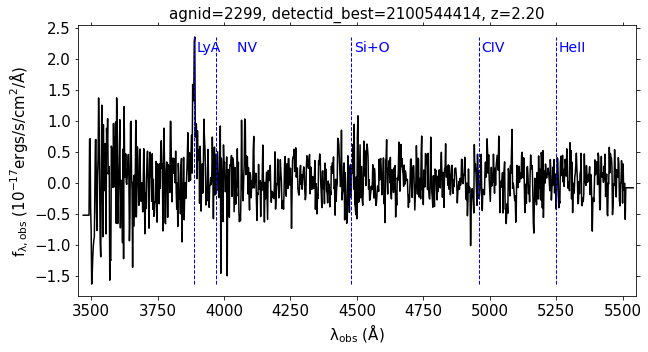

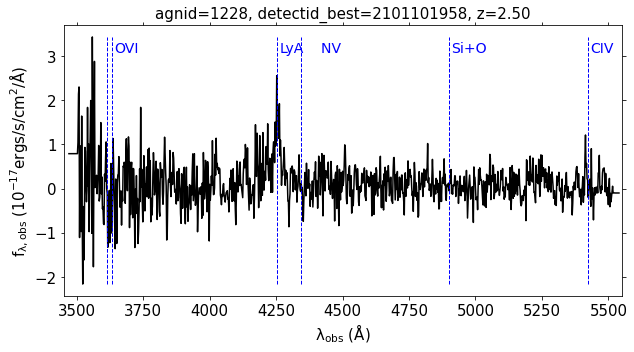

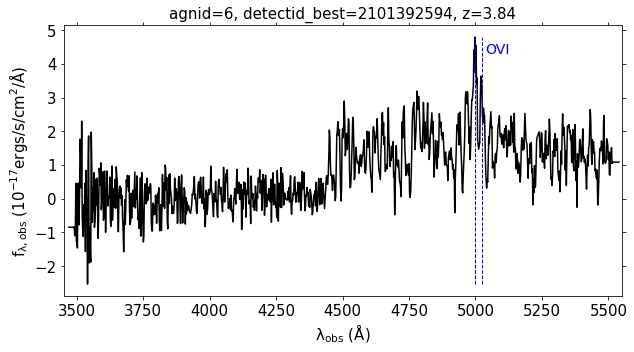

In [9]:
from IPython.display import Image
import matplotlib.pyplot as plt

# ............
w_CIIIa = 977.030
w_NIII  = 991.514
w_OVIa  = 1031.912
w_OVIb  = 1037.613
w_LyA   = 1215.24 
w_NV    = 1240.81
w_OI    = 1305.53
w_CIIa  = 1335.31
w_SiO   = 1399.8
w_CIV   = 1549.48
w_HeII  = 1640.40
w_OIII  = 1665.85
w_CIIIb = 1908.734
w_CIIb  = 2326.0
w_NeIV  = 2439.5
w_MgII  = 2799.117
w_OII   = 3729.875
w_NeVI  = 3426.85
w_NeIII = 3868.760
w_Hg    = 4341.68
# ............

fontsize = 15
xl, xh = 3450, 5550 

# plot some example spectra at the following redshifts
z_sel = np.array( [ 0.9, 1.3, 1.8, 2.2, 2.5, 3.9 ] )

for i in range(np.size(z_sel)):
    sel  = agn['z'] < z_sel[i]
    dtmp = im[sel]
    flux_arr = dtmp[0]
    
    fig, ax = plt.subplots( figsize = ( 10., 5.)  )
    
    plt.plot( wave_arr, flux_arr, 'k' )
    
    lines   = np.array( [  w_OVIa, w_OVIb, w_LyA,   w_NV,   w_SiO,  w_CIV, w_HeII,   w_CIIb, w_CIIIb,  w_MgII, w_OII, w_NeVI, w_NeIII  ] )
    labels  = np.array( [  ' ',     'OVI',  'LyA','    NV', 'Si+O',   'CIV', 'HeII',    'C2', 'C III]', 'MgII', 'OII', 'NeVI', 'NeIII' ] )    

    yl, yh = np.min(flux_arr), np.max(flux_arr)
    for i in range( np.size(lines) ):
        wline = lines[i] * ( 1 + agn[sel]['z'][0] )
        if( ( wline >= xl ) and (wline <= xh ) ):
            wline = np.full( 2, wline )     
            plt.text( wline[0]+10, 0.9 * yh, labels[i], color = 'blue', fontsize=14 )
            plt.plot( wline,  np.array([yl,yh]), color = 'blue', linestyle = '--', linewidth = 1.0 )
    
    plt.xlim( xl, xh )
    plt.tick_params( which = 'both', bottom=True, top=True, left=True, right=True )

    plt.xlabel('$\mathrm{\lambda_{obs}\ (\AA)}$',fontsize=fontsize)
    plt.ylabel('$\mathrm{f_{\lambda,obs}\ (10^{-17} ergs/s/cm^2/\AA)}$',fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    stitle = 'agnid=%d, detectid_best=%d, z=%.2f' % (agn[sel]['agnid'][0], agn[sel]['detectid_best'][0], agn[sel]['z'][0])
    plt.title( stitle, fontsize=fontsize )
    plt.show()
    #plt.savefig( 'tmp.png', format='png')
    #Image('tmp.png')

# read extension 4 in as a table of repeat observation info
### There are some repeat observations for some agns. In this table, each observation has one entry with a unique "shotid", nshots shows the number of repeat observations for each unique AGN.

In [10]:
tab = Table.read( fname, format = 'fits', hdu = 4 )
tab

<Table length=6004>
agnid nshots    shotid  
int64 int64     int64   
----- ------ -----------
    1      1 20191006024
    2      1 20190504027
    3      1 20190403022
    4      2 20200414024
    4      2 20200527024
    5      2 20190501017
    5      2 20190429016
    6      1 20191024024
    7      1 20171115010
    8      1 20200325031
  ...    ...         ...
 5369      1 20180511009
 5370      1 20190101013
 5371      1 20181106013
 5372      1 20200413019
 5373      1 20191027016
 5374      1 20190428024
 5375      1 20181114017
 5376      1 20200414015
 5377      1 20171114010
 5378      1 20190301014

In [11]:
sel = tab['nshots'] == 1
print("There are %d AGNs that are only observed once" % np.sum(sel))

sel = tab['nshots'] == 2
dtmp = np.unique( tab[sel]['agnid'] )
print("There are %d AGNs that are observed twice" % np.size(dtmp) )

sel = tab['nshots'] > 2
dtmp = np.unique( tab[sel]['agnid'] )
print("There are %d AGNs that are observed more than twice" % np.size(dtmp) )

There are 4799 AGNs that are only observed once
There are 437 AGNs that are observed twice
There are 74 AGNs that are observed more than twice


# find all spectra and their error of a certain AGN in extension 5 and 6

### find some strong agns (big nmem) with secure redshifts (z!=0) with more than five repeat observations

In [12]:
sel1 = agn['nshots'] >= 5
sel2 = agn['zflag' ] != 0
sel = sel1 * sel2
dtmp = agn[sel]
sel = np.argsort(-dtmp['nmem'])
dtmp[sel]

<Table length=10>
agnid     ra       dec       z    ... mjd_dr16     z_dr16     sflag  apcor 
         deg       deg            ...                                      
int64  float32   float32  float32 ...  int64      float32     int64 float32
----- --------- --------- ------- ... -------- -------------- ----- -------
 3194 150.23174 2.3640766   1.928 ...    55630      1.9314914     2   0.951
 2832 150.02542 2.0879166   2.052 ...    54821  0.00014259022     2   0.724
 2114  189.3471 62.260574   2.241 ...    56686 -0.00065181305     1   0.765
 2209 189.26814 62.246063   2.216 ...    56686 -0.00065181305     2   0.916
 2720 150.23596 2.2890444 2.08686 ...    55630     0.16566485     1   0.956
 1273 150.18307  2.247664   2.487 ...    51994  6.8515124e-05    -1   0.913
 2195  150.1798  2.247135    2.22 ...    51994  6.8515124e-05     1   0.908
 2420 189.04907 62.242523   2.167 ...    52373      2.5859513     1   0.912
 2970 189.19429 62.246147   2.004 ...    56686 -0.00065181305     1   0.929
 4611 189.26724 62.132046    1.26 ...    56686      0.5605918     2   0.896

### take agnid = 3194 as an example

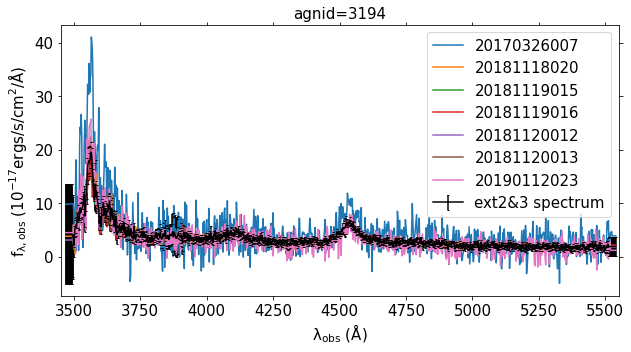

In [13]:
agnid = 3194

im_arr    = hdul[5].data
im_er_arr = hdul[6].data

sel = np.where( tab['agnid'] == agnid )
shotid_arr  = tab[sel]['shotid']
flux_arr    = im_arr[sel]
flux_er_arr = im_er_arr[sel]

# arrange the repeat observations by time
sel = np.argsort( shotid_arr )
shotid_arr, flux_arr, flux_er_arr = shotid_arr[sel], flux_arr[sel], flux_er_arr[sel]

# prepare the wavelength array for the spectra
wave_start = 3470.0
wave_step  = 2.0
n_elements = hdul[5].header['NAXIS1'] #1036
wave_arr = wave_start + wave_step * np.arange( 0, n_elements )

# plot all repeat observations
fig, ax = plt.subplots( figsize = ( 10., 5.)  )

for i in range(np.size(shotid_arr)):
    
    plt.plot( wave_arr, flux_arr[i], label = '%d' % shotid_arr[i])
    #plt.errorbar( wave_arr, flux_arr[i], flux_er_arr[i] , capsize = 1.5, label = '%d' % shotid_arr[i] )

# overplot with the catalog spectrum for detectid_best in ext 2&3 as black and compare with ext 5&6
im_arr    = hdul[2].data
im_er_arr = hdul[3].data
sel = agn['agnid'] == agnid
flux_arr    = im_arr[sel][0]
flux_er_arr = im_er_arr[sel][0]
plt.errorbar( wave_arr, flux_arr, flux_er_arr, color = 'k',capsize = 1., \
              label = 'ext2&3 spectrum')
    
plt.xlim( xl, xh )
plt.tick_params( which = 'both', bottom=True, top=True, left=True, right=True )

plt.xlabel('$\mathrm{\lambda_{obs}\ (\AA)}$',fontsize=fontsize)
plt.ylabel('$\mathrm{f_{\lambda,obs}\ (10^{-17} ergs/s/cm^2/\AA)}$',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
stitle = 'agnid=%d' % (agnid)
plt.title( stitle, fontsize=fontsize )
plt.show()